In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
# Load signal sample into memory
with uproot.open("ntuples/pufr_fixed_jetME/dataset_mu60_ztt1000_10k.root:fastjet") as f:
    jet_pt_sig = f["jet_pt"].array()
    jet_eta_sig = f["jet_eta"].array()
    jet_phi_sig = f["jet_phi"].array()
    jet_m_sig = f["jet_m"].array()
    jet_pufr_sig = f["jet_pufr_truth"].array()
    jet_origin_sig = f["jet_origin"].array()
    jet_label_sig = ak.ones_like(jet_pt_sig)

# Load background sample into memory
with uproot.open("ntuples/pufr_fixed_jetME/dataset_mu60_ttbar_10k.root:fastjet") as f:
    jet_pt_bkg = f["jet_pt"].array()
    jet_eta_bkg = f["jet_eta"].array()
    jet_phi_bkg = f["jet_phi"].array()
    jet_m_bkg = f["jet_m"].array()
    jet_pufr_bkg = f["jet_pufr_truth"].array()
    jet_origin_bkg = f["jet_origin"].array()
    jet_label_bkg = ak.zeros_like(jet_pt_bkg)

In [3]:
class Jet:
    """
    The Jet object contains the features of each jet at the event level.
    It also has many useful methods to assist with data processing.
    """
    def __init__(self, feats):
        pt, eta, phi, m, pufr, label, origin = feats
        self.pt = pt
        self.eta = eta
        self.phi = phi
        self.m = m
        self.pufr = pufr
        self.label = label
        self.origin = origin
        
    def __len__(self):
        return len(self.pt)
        
    def apply_mask(self, mask):
        self.pt = self.pt[mask]
        self.eta = self.eta[mask]
        self.phi = self.phi[mask]
        self.m = self.m[mask]
        self.pufr = self.pufr[mask]
        self.label = self.label[mask]
        self.origin = self.origin[mask]
        
    def return_event_idx(self):
        sig = (self.label==1)
        sig_event = ak.mean(sig,axis=1)==1
        bkg_event = ak.mean(sig,axis=1)==0
        return sig_event,bkg_event

In [4]:
# Construct list of features
feats_sig = [jet_pt_sig, jet_eta_sig, jet_phi_sig, jet_m_sig, jet_pufr_sig, jet_label_sig, jet_origin_sig]
feats_bkg = [jet_pt_bkg, jet_eta_bkg, jet_phi_bkg, jet_m_bkg, jet_pufr_bkg, jet_label_bkg, jet_origin_bkg]

# Combined Signal and Background
feats = []
for i in range(len(feats_sig)):
    feats.append(ak.concatenate([feats_sig[i],feats_bkg[i]], axis=0))
    
# Initialize Jet object and pass features
jets = Jet(feats)

# Print features
print(jets.pt)
print(jets.eta)
print(jets.phi)
print(jets.m)
print(jets.pufr)
print(jets.label)
print(jets.origin)

[[228, 172, 117, 98.6, 84.6, 47.1, ..., 26.7, 26.4, 25.8, 25.8, 25.5], ...]
[[-1.18, 1.31, 0.943, -1.1, 0.682, ..., -2.4, 3.03, -3.3, 1.94, 1.83], ...]
[[2.05, 4.71, 5.34, 1.46, 6.11, 3.81, ..., 2.23, 1.86, 4.27, 5.31, 0.443], ...]
[[50.4, 35.5, 31.4, 27.7, 22.9, 27.7, ..., 14.6, 14.4, 10.3, 14.7, 14.4], ...]
[[0.0379, 0.00049, 0.0966, 0.00467, 0.0275, ..., 0.345, 1, 0.949, 1], ...]
[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], ...]
[[24, -24, -24, 24, 6, -1, -1, 6, -1, ..., 6, 6, -1, -1, -1, -1, -1, -1], ...]


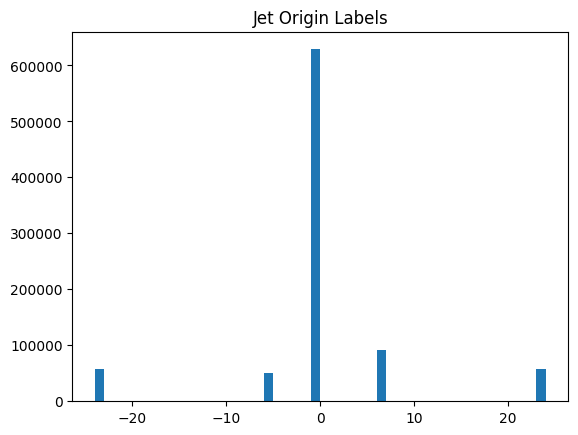

In [5]:
# Plot Origin Labels
plt.hist(ak.flatten(jets.origin), bins=48)
plt.title("Jet Origin Labels")
plt.show()

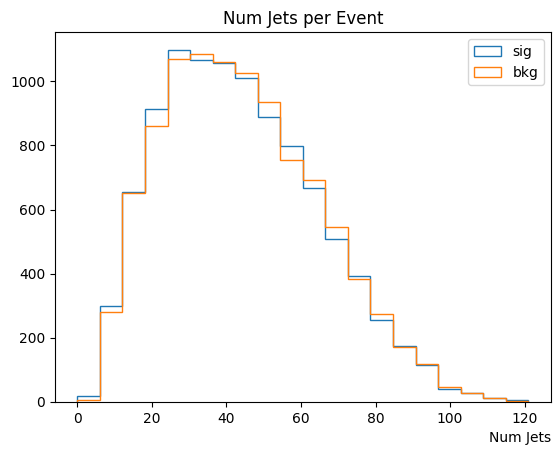

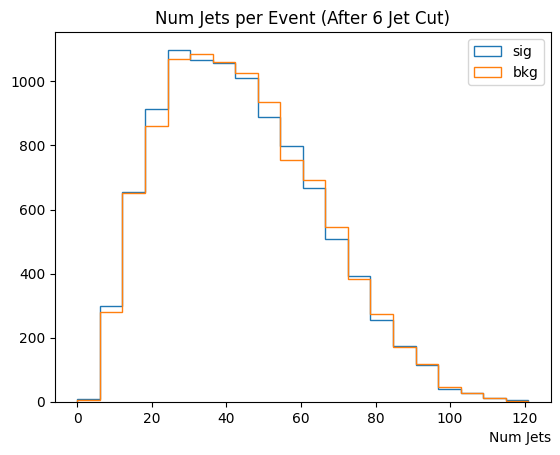

In [6]:
# Plot number of jets per event
h_num_jets = ak.num(jets.pt,axis=1)
sig,bkg = jets.return_event_idx()
plt.title('Num Jets per Event')
plt.hist(h_num_jets[sig],histtype='step',label='sig',bins=20,range=(0,ak.max(h_num_jets)))
plt.hist(h_num_jets[bkg],histtype='step',label='bkg',bins=20,range=(0,ak.max(h_num_jets)))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()

# Require at least six jets
mask = h_num_jets>=6
jets.apply_mask(mask)
h_num_jets = ak.num(jets.pt,axis=1)
sig,bkg = jets.return_event_idx()
plt.title('Num Jets per Event (After 6 Jet Cut)')
plt.hist(h_num_jets[sig],histtype='step',label='sig',bins=20,range=(0,ak.max(h_num_jets)))
plt.hist(h_num_jets[bkg],histtype='step',label='bkg',bins=20,range=(0,ak.max(h_num_jets)))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()

In [35]:
# Validation plots
var_names = ['pT','Eta','Phi','Mass']
var_list = [jets.pt,jets.eta,jets.phi,jets.m]


print(jets.pt[0])
print(len(jets.pt[0]))
print()

# Get leading jet pT
maxi = ak.max(jets.pt, axis=1, keepdims=True)
print(max(jets.pt[0]))
print(maxi)

print()
idx = ak.argmax(jets.pt, axis=0, keepdims=True)
print(idx)

# Get subleading jet pT

[228, 172, 117, 98.6, 84.6, 47.1, 38.5, ..., 27.3, 26.7, 26.4, 25.8, 25.8, 25.5]
26

227.91658
[[228], [310], [310], [346], [129], ..., [105], [153], [596], [125], [174]]

[[16786, 16786, 89, 6810, 8853, 1244, ..., 10841, 10841, 10841, 10841, 10841]]


In [37]:
for i in range(10):
    print(jets.pt[i][0], max(jets.pt[i]))
    print()

227.91658 227.91658

309.91156 309.91156

309.522 309.522

346.1088 346.1088

129.3403 129.3403

128.4047 128.4047

370.6561 370.6561

92.841385 92.841385

237.97156 237.97156

372.1327 372.1327



In [39]:
print(jets.pt[:,0])

[228, 310, 310, 346, 129, 128, 371, ..., 103, 182, 105, 153, 596, 125, 174]


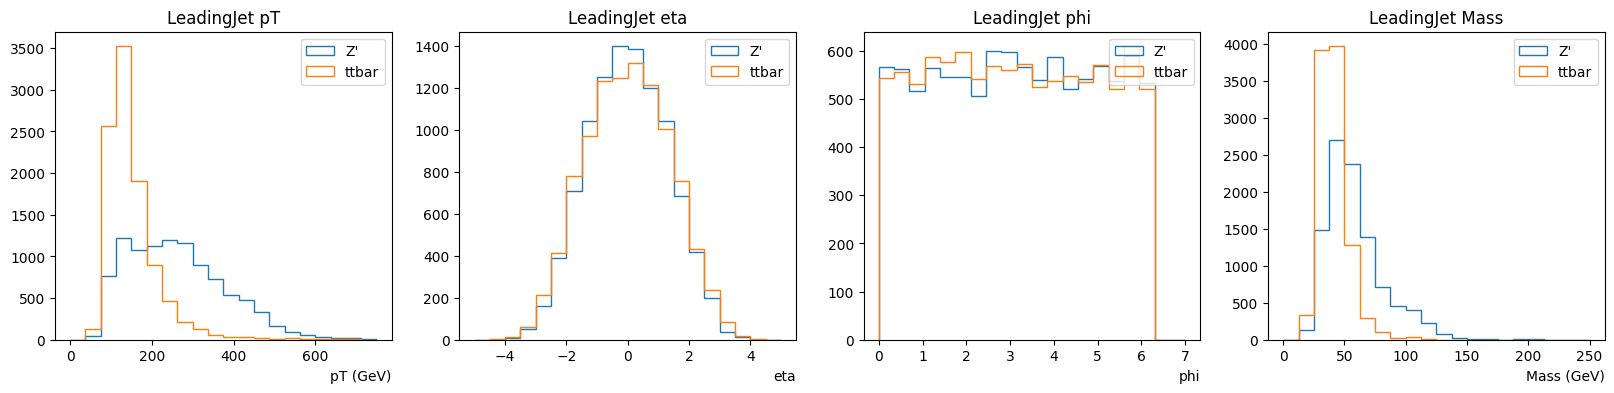

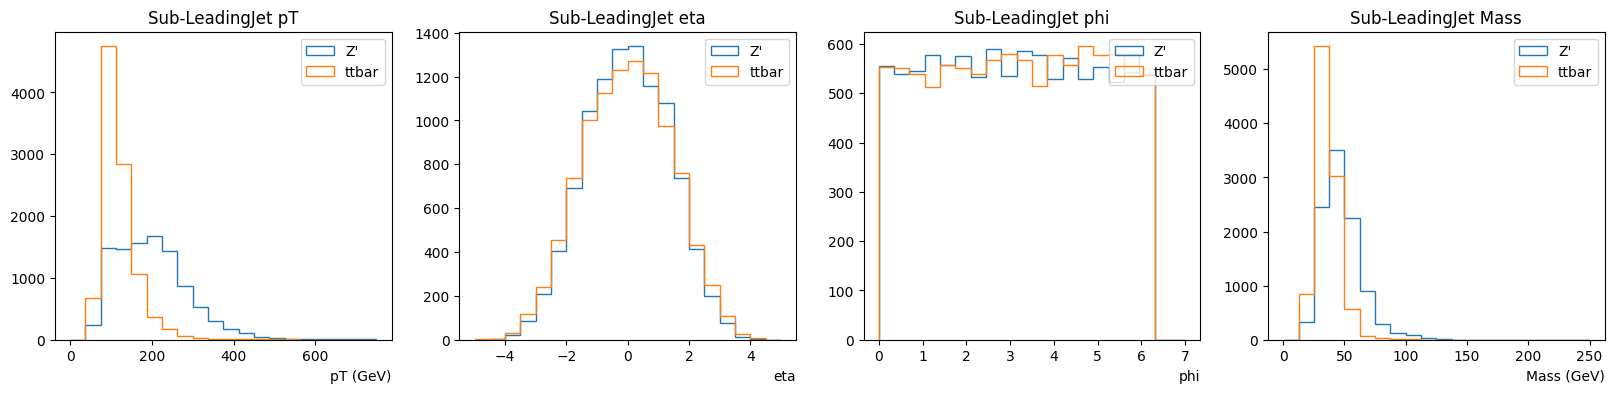

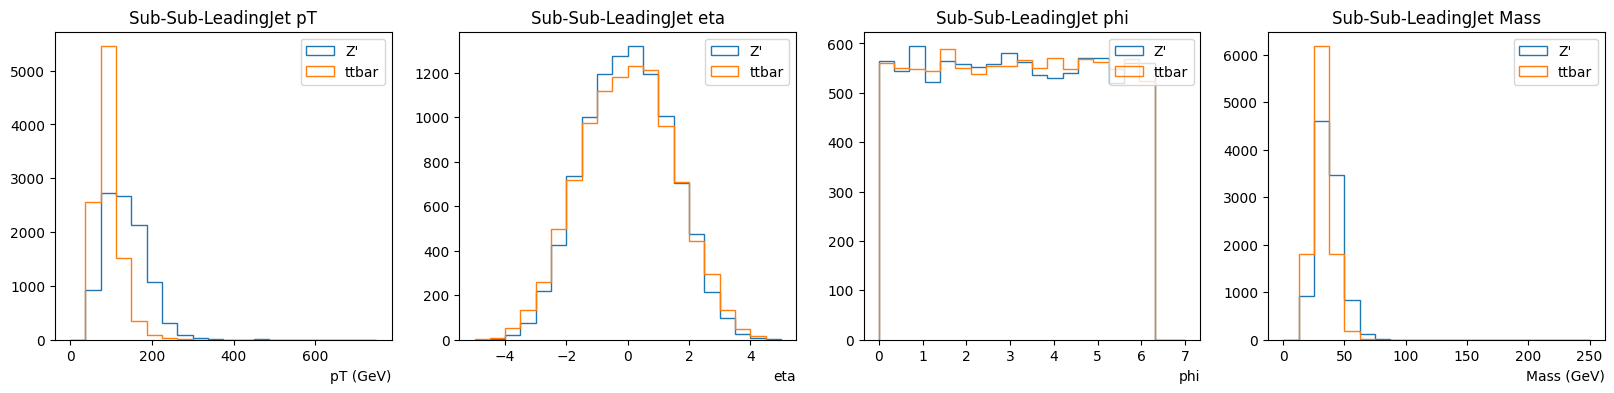

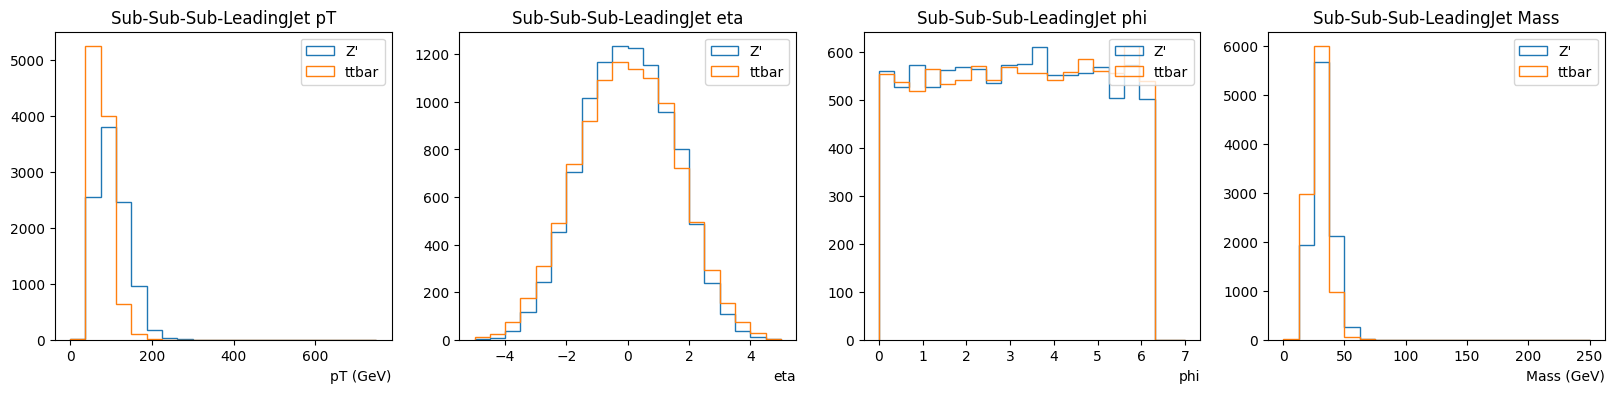

In [70]:
sig,bkg = jets.return_event_idx()

var_list = ['Leading','Sub-Leading','Sub-Sub-Leading','Sub-Sub-Sub-Leading']

for i, name in enumerate(var_list):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))

    ax1.set_title(name+'Jet pT')
    ax1.hist(jets.pt[:,i][sig],histtype='step',label='Z\'',bins=20,range=(0,750))
    ax1.hist(jets.pt[:,i][bkg],histtype='step',label='ttbar',bins=20,range=(0,750))
    ax1.set_xlabel('pT (GeV)',loc='right')
    ax1.legend(loc='upper right')

    ax2.set_title(name+'Jet eta')
    ax2.hist(jets.eta[:,i][sig],histtype='step',label='Z\'',bins=20,range=(-5,5))
    ax2.hist(jets.eta[:,i][bkg],histtype='step',label='ttbar',bins=20,range=(-5,5))
    ax2.set_xlabel('eta',loc='right')
    ax2.legend(loc='upper right')


    ax3.set_title(name+'Jet phi')
    ax3.hist(jets.phi[:,i][sig],histtype='step',label='Z\'',bins=20,range=(0,7))
    ax3.hist(jets.phi[:,i][bkg],histtype='step',label='ttbar',bins=20,range=(0,7))
    ax3.set_xlabel('phi',loc='right')
    ax3.legend(loc='upper right')

    ax4.set_title(name+'Jet Mass')
    ax4.hist(jets.m[:,i][sig],histtype='step',label='Z\'',bins=20,range=(0,250))
    ax4.hist(jets.m[:,i][bkg],histtype='step',label='ttbar',bins=20,range=(0,250))
    ax4.set_xlabel('Mass (GeV)',loc='right')
    ax4.legend(loc='upper right')
    plt.show()

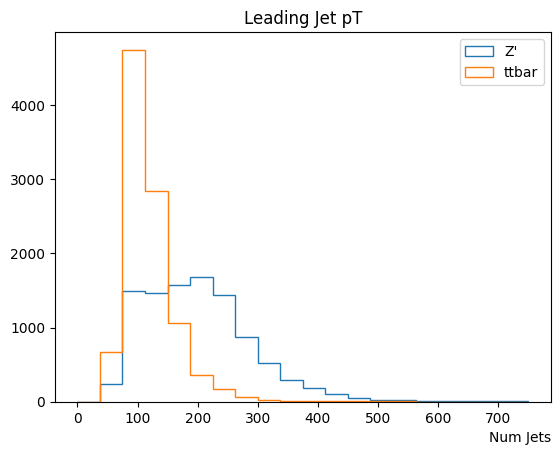

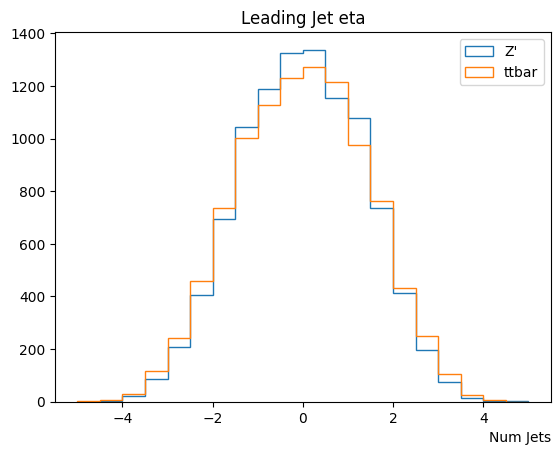

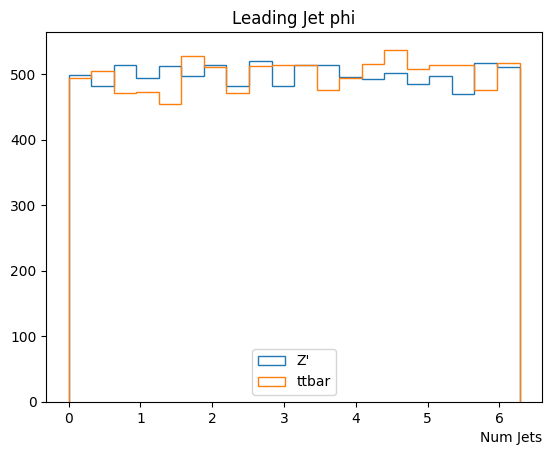

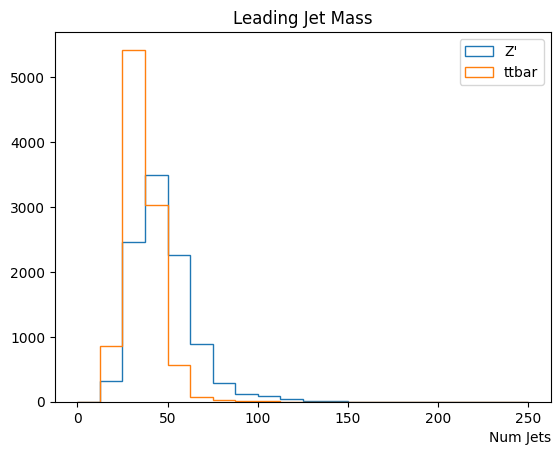

In [51]:
sig,bkg = jets.return_event_idx()

plt.title('Leading Jet pT')
plt.hist(jets.pt[:,1][sig],histtype='step',label='Z\'',bins=20,range=(0,750))
plt.hist(jets.pt[:,1][bkg],histtype='step',label='ttbar',bins=20,range=(0,750))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()

plt.title('Leading Jet eta')
plt.hist(jets.eta[:,1][sig],histtype='step',label='Z\'',bins=20,range=(-5,5))
plt.hist(jets.eta[:,1][bkg],histtype='step',label='ttbar',bins=20,range=(-5,5))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()

plt.title('Leading Jet phi')
plt.hist(jets.phi[:,1][sig],histtype='step',label='Z\'',bins=20,range=(0,6.28))
plt.hist(jets.phi[:,1][bkg],histtype='step',label='ttbar',bins=20,range=(0,6.28))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()

plt.title('Leading Jet Mass')
plt.hist(jets.m[:,1][sig],histtype='step',label='Z\'',bins=20,range=(0,250))
plt.hist(jets.m[:,1][bkg],histtype='step',label='ttbar',bins=20,range=(0,250))
plt.xlabel('Num Jets',loc='right')
plt.legend()
plt.show()